**Name**- Prathamesh .P. Niungare <br>
**Roll no.**- 50 <br>
**Experiment 2**- Implementation of an End-to-End Machine Learning Data Pipeline.<br>
**SE AIML**<br>
**Batch-3**<br>
**19-1-2026**  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns
titanic_data = sns.load_dataset('titanic')
print(titanic_data.shape)

(891, 15)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [12]:
print(titanic_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [13]:
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [14]:
print(titanic_data.tail())

     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  


In [16]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [17]:
print(titanic_data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [18]:
missing_values = titanic_data.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [19]:
new_titanic_df = titanic_data.drop(columns=['deck'])

In [20]:
new_titanic_df['age'].fillna(new_titanic_df['age'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18804\1870140451.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_titanic_df['age'].fillna(new_titanic_df['age'].median(),inplace=True)


In [21]:
missing_values = new_titanic_df.isnull().sum()
print(missing_values)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [23]:
data = new_titanic_df
data['embark_town'].dtype
data['embark_town'].unique()
data['embark_town'].fillna(data['embark_town'].mode()[0],inplace=True)
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [25]:
data['embarked'].dtype
data['embarked'].unique()
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)
data.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_18804\2518935106.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [27]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True


In [ ]:
data = data[['pclass','sex','age','fare','embarked','survived']]
X = data[['pclass','sex','age','fare','embarked']]
y = data['survived']

KeyError: "None of [Index(['pclass', 'sex', 'age', 'fare', 'embarked', 'survived'], dtype='object')] are in the [index]"

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

In [31]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)


In [33]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7947761194029851


In [34]:
new_passenger = pd.DataFrame({
    'pclass':[3],
    'sex': ['male'],
    'age':[28],
    'fare':[7.25],
    'embarked':['S']
})

In [36]:
new_passenger_encoded = pd.get_dummies(new_passenger)
new_passenger_encoded = new_passenger_encoded.reindex(columns=X.columns,fill_value=0)

In [37]:
prediction = model.predict(new_passenger_encoded)
print("Survived" if prediction[0] == 1 else "Did Not Survive")

Survived


In [45]:
new_passengers=pd.DataFrame({
    'pclass':[1,3,2],
    'sex':['female','male','female'],
    'age':[38,45,14],
    'fare':[80.0,8.05,20.0],
    'embarked':['C','S','Q']
    })

In [46]:
new_passengers_encoded = pd.get_dummies(new_passengers)
new_passengers_encoded = new_passengers_encoded.reindex(columns=X.columns,fill_value=0)

In [47]:
predictions = model.predict(new_passengers_encoded)
for i,pred in enumerate(predictions):
    print(f"Passenger {i+1}:",
          "Survived" if pred==1 else "Did Not Survive")

Passenger 1: Survived
Passenger 2: Survived
Passenger 3: Survived


In [48]:
# Exercise on using a technique to find the outlier
data = X['fare']
mean = np.mean(data) # calculates the mean
std_dev = np.std(data) # calculates the standard deviation
Z_scores = (data - mean) / std_dev # computes the Z-scores
outliers = data[np.abs(Z_scores) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("\nOutliers in 'Fare' using Z-score: \n", outliers)


Outliers in 'Fare' using Z-score: 
 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: fare, dtype: float64


In [49]:
# Outlier detection - 'Age'
mean_age = np.mean(X['age']) # calculates the mean
std_dev_age = np.std(X['age']) # calculates the standard deviation
Z_scores_age = (X['age'] - mean_age) / std_dev_age # computes the Z-scores
outliers_age = X['age'][np.abs(Z_scores_age) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("Outliers in 'Age' using Z-score: \n", outliers_age)

Outliers in 'Age' using Z-score: 
 96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64


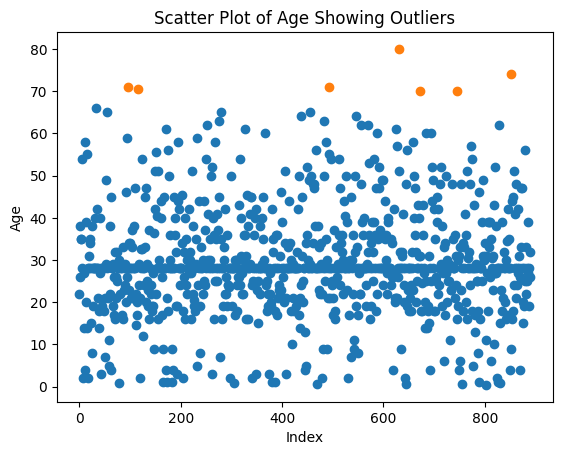

In [50]:
import matplotlib.pyplot as plt

# Separate normal points and outliers
normal_points = X['age'][np.abs(Z_scores_age) <= 3]

plt.figure()
plt.scatter(normal_points.index, normal_points)
plt.scatter(outliers_age.index, outliers_age)

plt.xlabel("Index")
plt.ylabel("Age")
plt.title("Scatter Plot of Age Showing Outliers")

plt.show()


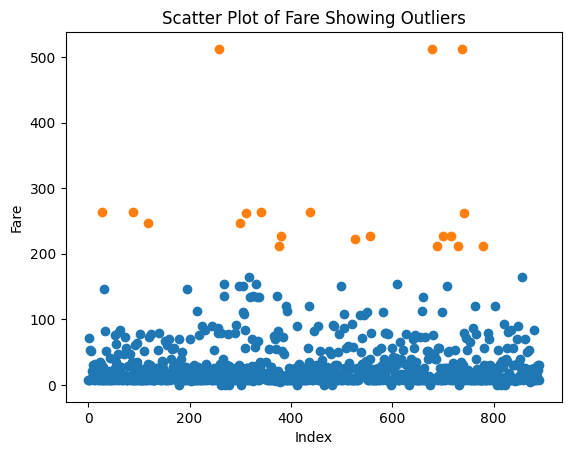

In [51]:
import matplotlib.pyplot as plt

# Separate normal points and outliers
normal_points = data[np.abs(Z_scores) <= 3]

plt.figure()
plt.scatter(normal_points.index, normal_points)
plt.scatter(outliers.index, outliers)

plt.xlabel("Index")
plt.ylabel("Fare")
plt.title("Scatter Plot of Fare Showing Outliers")

plt.show()


In [69]:
# AGE standardization
age_mean = np.mean(X['age'])
age_std = np.std(X['age'])
X['age_standardized'] = (X['age'] - age_mean) / age_std

# FARE standardization
fare_mean = np.mean(X['fare'])
fare_std = np.std(X['fare'])
X['fare_standardized'] = (X['fare'] - fare_mean) / fare_std

print(X[['age_standardized', 'fare_standardized']].head())
X = X.drop(columns=['age','fare'])
print(X.head())

KeyError: 'age'

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

In [64]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [65]:
y_pred = model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7686567164179104
